# Data Wrangling Project

## Gathering the data

In [52]:
#importing the necessary packages to gather data

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from PIL import Image
from io import BytesIO

### Twitter enhanced file

In [54]:
#read the provided twitter_archive_enhanced.csv file

twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Image predictions table

Use requests library to programatically download image_predictions.tsv

In [55]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [56]:
#use requests to download file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [57]:
#read the tsv file

image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
#create folder for twitter images downloaded
folder_name_2 = 'pictures'

#make directory if it doesn't already exist
if not os.path.exists(folder_name_2):
    os.makedirs(folder_name_2)

In [59]:
#download all images from urls
#tweet_images = []
#for index,row in image_predictions.iterrows():
#    try:
#        image = requests.get(row['jpg_url'])
#        i = Image.open(BytesIO(image.content))
#        image_file_format = row['jpg_url'].split('.')[-1]
#        i.save(folder_name_2 + '/' + str(row['tweet_id']) + '.' + image_file_format)
#    except Exception as e:
#        print(str(row['tweet_id']) + ': ' + str(e))

For the two files that brought about an error, it would be best to download these files individually.

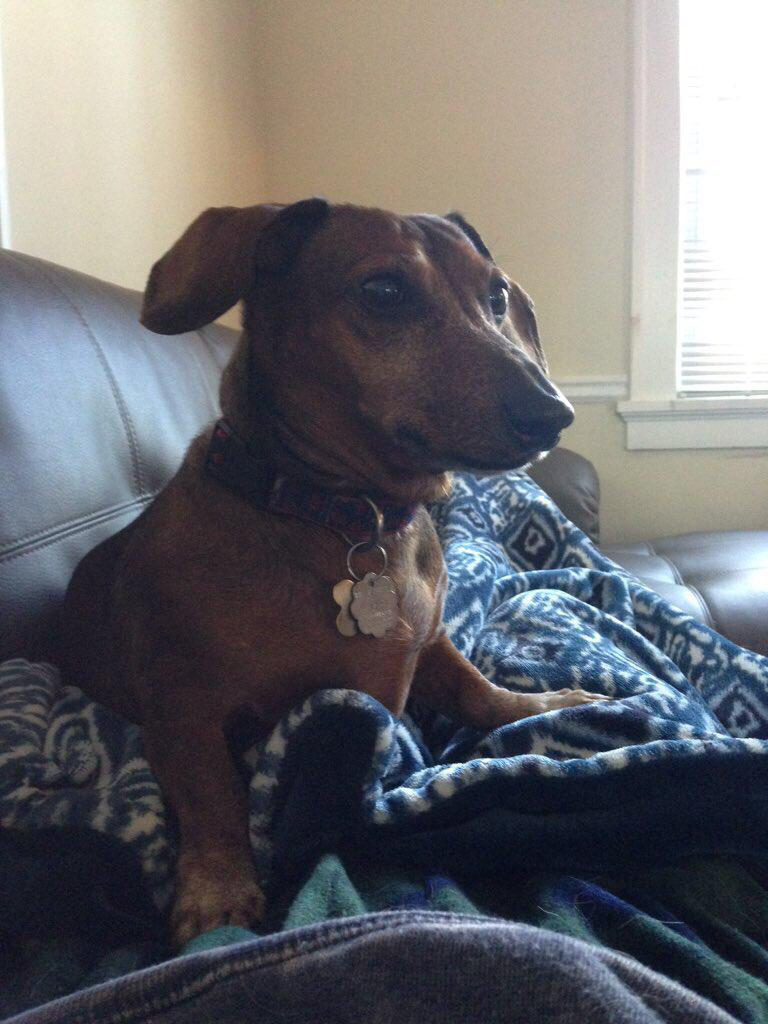

In [60]:
Image.open('pictures/666044226329800704.jpg')

### Twitter favorites, likes using API

Set up and use Twitter API from tweepy library

In [61]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [62]:
tweet_ids = list(twitter_enhanced['tweet_id'])
tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [63]:
'''
#query twitter api to extract retweet and likes data

twitter_info = []
for tweet in tweet_ids:
    try:
        tweets = api.get_status(tweet)
        retweets = tweets.retweet_count
        likes = tweets.favorite_count
        twitter_info.append({'tweet_id': tweet,
                            'retweets': retweets,
                            'likes': likes})
    except Exception as e:
        print(str(tweet) + ': ' + str(e))
'''

"\n#query twitter api to extract retweet and likes data\n\ntwitter_info = []\nfor tweet in tweet_ids:\n    try:\n        tweets = api.get_status(tweet)\n        retweets = tweets.retweet_count\n        likes = tweets.favorite_count\n        twitter_info.append({'tweet_id': tweet,\n                            'retweets': retweets,\n                            'likes': likes})\n    except Exception as e:\n        print(str(tweet) + ': ' + str(e))\n"

In [64]:
'''
#write the twitter api results to a json file
with open('tweet_json.txt', 'w') as outfile:
    json.dump(twitter_info, outfile)
'''

"\n#write the twitter api results to a json file\nwith open('tweet_json.txt', 'w') as outfile:\n    json.dump(twitter_info, outfile)\n"

In [65]:
#reading the json file containing twitter api data
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

In [66]:
#convert json data into dataframe
df = pd.DataFrame(data, columns = ['tweet_id', 'retweets', 'likes'])
df.head()

,tweet_id,retweets,likes
0,892420643555336193,7839,36771
1,892177421306343426,5803,31658
2,891815181378084864,3843,23846
3,891689557279858688,8006,40099
4,891327558926688256,8644,38294


In [67]:
#confirm the number of rows in the dataframe
df.shape[0]

2333

### Adding simple sentiment analysis to the tweets

In [68]:
#gather all the text from all the tweets in twitter_enhanced and join together to form one large string
string = twitter_enhanced.text.str.cat()

In [69]:
#import additional libraries required to build sentiment analysis and gather more data on the tweets

from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [70]:
#most common words in tweets
Counter(string.split()).most_common()

[('is', 1610),
 ('a', 1200),
 ('to', 754),
 ('the', 681),
 ('12/10', 535),
 ("He's", 523),
 ('He', 486),
 ('would', 469),
 ('11/10', 454),
 ('10/10', 444),
 ('for', 390),
 ('of', 360),
 ('in', 343),
 ('13/10', 336),
 ('and', 268),
 ('his', 256),
 ('this', 210),
 ('just', 195),
 ('be', 195),
 ('on', 192),
 ('with', 189),
 ('pet', 188),
 ('you', 185),
 ('pupper', 176),
 ('but', 171),
 ('af', 170),
 ('She', 168),
 ("She's", 161),
 ('@dog_rates:', 156),
 ('af.', 155),
 ('I', 150),
 ('9/10', 148),
 ('dog', 144),
 ('that', 144),
 ('he', 142),
 ('This', 139),
 ('an', 139),
 ('good', 133),
 ('at', 132),
 ('very', 128),
 ('your', 122),
 ('not', 121),
 ('only', 120),
 ('her', 119),
 ('by', 118),
 ('as', 116),
 ('it', 115),
 ('was', 114),
 ('all', 114),
 ('like', 112),
 ('hello', 107),
 ('8/10', 103),
 ('has', 99),
 ('pup', 97),
 ('dogs.', 95),
 ('h*ckin', 93),
 ('so', 92),
 ('rate', 90),
 ('are', 89),
 ('one', 86),
 ('have', 85),
 ('him', 81),
 ('still', 79),
 ('here.', 77),
 ('Very', 75),
 ('do

In [71]:
#tokenize the string
string_token = word_tokenize(string)

In [72]:
#add tags to each word in the string. Look for tag 'JJ' as these are desscriptive (adjective) words
string_pos_tag = pos_tag(string_token)

In [73]:
string_pos_tag

[('This', 'DT'),
 ('is', 'VBZ'),
 ('Phineas', 'NNP'),
 ('.', '.'),
 ('He', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('mystical', 'JJ'),
 ('boy', 'NN'),
 ('.', '.'),
 ('Only', 'RB'),
 ('ever', 'RB'),
 ('appears', 'VBZ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('hole', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('donut', 'NN'),
 ('.', '.'),
 ('13/10', 'CD'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/MgUWQ76dJUThis', 'NN'),
 ('is', 'VBZ'),
 ('Tilly', 'RB'),
 ('.', '.'),
 ('She', 'PRP'),
 ("'s", 'VBZ'),
 ('just', 'RB'),
 ('checking', 'VBG'),
 ('pup', 'NN'),
 ('on', 'IN'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Hopes', 'VBZ'),
 ('you', 'PRP'),
 ("'re", 'VBP'),
 ('doing', 'VBG'),
 ('ok', 'NN'),
 ('.', '.'),
 ('If', 'IN'),
 ('not', 'RB'),
 (',', ','),
 ('she', 'PRP'),
 ("'s", 'VBZ'),
 ('available', 'JJ'),
 ('for', 'IN'),
 ('pats', 'NNS'),
 (',', ','),
 ('snugs', 'NNS'),
 (',', ','),
 ('boops', 'NNS'),
 (',', ','),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('bit', 'NN'),
 ('.', '.'),
 ('13/10', 'CD'),
 ('https', 'NN'),
 (

In [74]:
#lemmatize the string
def lemmatize_string(string_pos_tag):
    lemmatizer = WordNetLemmatizer()
    lemmatized_string = []
    for word, tag in pos_tag(string_pos_tag):
        if tag.startswith('JJ'):
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
        else:
            pass
    return lemmatized_sentence

In [75]:
#only select words that are adjectives
lemmatized = []

for word, tag in string_pos_tag:
    if tag.startswith('JJ'):
        lemmatized.append(word)
    else:
        pass

In [76]:
#number of words that are adjectives in the tweets
len(lemmatized)

3932

In [77]:
#counting instances of each word
adj_counts = Counter(lemmatized)

In [78]:
#converting the adjectives data to a dataframe
df_adj = pd.DataFrame.from_dict(adj_counts, orient='index', columns=['count'])

#reset index and sort the dataframe alphabetically
df_adj.reset_index().sort_values(by='index', ascending=True).head()

,index,count
788,'Merica,1
1130,'summer,1
1412,*finger,1
1472,-5/10,1
487,//t.co/0LdNjoiNbvRT,1


In [79]:
#only want to see the words used frequently in the tweets, to remove one-off words/phrases that are not generic
df_adj_top = df_adj[df_adj['count'] >= 10]
df_adj_top

,count
rare,48
best,28
such,19
majestic,11
great,36
h*ckin,64
more,23
good,144
much,27
favorite,18


From df_adj_top, words that were thought of as having strong sentiment towards the dog in the tweet were classified as strong.<br>
Words thought to have medium sentiment were then classified as medium.<br>
If these words do not appear in the text then the sentiment is regular.

In [80]:
#list of strong sentiment words
strong = ['rare', 'best', 'majestic', 'great', 'favorite', 'super', 'precious', 'powerful', 'magical',
         'legendary']

#list of medium sentiment words
medium = ['good', 'much', 'many', 'deep', 'happy', 'big', 'true', 'proud', 'fluffy', 'pretty', 'strong', 'cute',
         'soft']

For each word in each tweet, a score was given depending on whether it was strong (2 points), medium (1 point) or regular (0 points). At the end of the tweet the score would be added up, and if the total score of the tweet was at least 4 points, it was determined to have strong sentiment. If the total tweet score had at least 2 points, but less than 3 points, it had medium sentiment. Otherwise it had regular sentiment. 

In [81]:
#list to append each tweet sentiment
sentiment_strength = []

#scoring each word per tweet
for index, row in twitter_enhanced.iterrows():
    text = row['text']
    words = text.lower().split()
    sentiment=0
    for word in words:
        if word in strong:
            sentiment+=2
        elif word in medium:
            sentiment+=1    
        else:
            sentiment+=0
    if sentiment >= 4:
        sentiment_strength.append({'tweet_id':row['tweet_id'],
                                  'sentiment':'strong'})
    elif sentiment >= 2:
        sentiment_strength.append({'tweet_id':row['tweet_id'],
                                  'sentiment':'medium'})
    else:
        sentiment_strength.append({'tweet_id':row['tweet_id'],
                                  'sentiment':'regular'})


In [82]:
#converting sentiment_strength to a dataframe
sentiment_df = pd.DataFrame(sentiment_strength)

In [83]:
#confirming the number of rows in this dataframe matches that of the twitter_enhanced dataframe
sentiment_df.shape[0]

2356

In [84]:
#checking that we have some strong sentimental tweets!
sentiment_df[sentiment_df['sentiment'] == 'strong']

,sentiment,tweet_id
5,strong,891087950875897856
566,strong,802247111496568832
751,strong,779056095788752897
1049,strong,743222593470234624
1091,strong,737445876994609152
1112,strong,733460102733135873
1140,strong,727685679342333952
1166,strong,722613351520608256
1204,strong,716080869887381504
1229,strong,713761197720473600


In [85]:
'''
#join sentiment_df to twitter_enhanced

twitter_enhanced = twitter_enhanced.join(sentiment_df, lsuffix='_enhanced', rsuffix='_sentiment')
'''

"\n#join sentiment_df to twitter_enhanced\n\ntwitter_enhanced = twitter_enhanced.join(sentiment_df, lsuffix='_enhanced', rsuffix='_sentiment')\n"

# Assess

Start be **visually** examining each dataframe that we started off with

In [86]:
#expand the column width to prevent columns cutting off the text
pd.set_option('display.max_colwidth', 400)
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

Lots of null values in the in_reply_to_status_id/in_reply_to_user_id columns. The rows with data here will have to be removed this data relates to retweet data, and the focus of this project is to focus on the original tweets. Same goes for retweeted_status_id/retweeted_status_user_id/retweeted_status_timestamp columns.

Also the source column looks to have very much the same type of data. This could be categorised to tidy it up and make it easier to read.

Row at index 2335, tweet_id 666287406224695296 is an incorrect rating of 1/2 when it is 9/10 from the text. This will need to be changed. Will also programatically check for rows where the denominator does not equal to 10 to check for further errors.

A lot of the names of the dogs are captured incorrectly. Due to the method by which the names were extracted from the text, a lot of names are now 'a' and 'an' or 'None'. This will need to be changed to null values to improve the quality.

The various stages of dog are laid out in separate columns, when they should really be classified into one column with four variables.

In [44]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Firstly, the column names (p1/p1_conf/p1_dog etc) are not descriptive at all in image_predictions, so they will need to be renamed

Secondly, some of the breed names of each dog here are beginning with upper case letters and some with lower case. This will need to be fixed for consistency.

Continue with **programmatic** assessment.

In [87]:
#checking general info about the dataframe
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 2356 rows of data contained within dataframe. However we have 181 retweeted status ids and 78 in reply to status ids which will need to be removed.

The timestamp is of type 'object' - it is a string. This will need to be converted to datetime for quality purposes.

The tweet_id is also in 'int64' format - it is an integer. This will need to be converted to string as the tweet id should not be of integer value.

Note that the dog stage columns and name column have every row filled. This will change as the incorrect data will be replaced with null values.

In [88]:
#checking general info about the dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2075 rows of data in this dataframe, compared to 2356 rows in the twitter_enhanced dataframe. Therefore we are missing some pictures. For the purpose of this project, the original tweets containing pictures will be kept.

Again the tweet id is in integer format when it should be a string.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id    2333 non-null int64
retweets    2333 non-null int64
likes       2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


df contains 2333 rows of data. Again the tweet id is in integer format when it should be string.

In [94]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
sentiment    2356 non-null object
tweet_id     2356 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


sentiment_df contains 2356 rows of data, simply because this was derived from twitter_enhanced.

In [91]:
#checking the high and low values of numerator and denominator in twitter_enhanced
twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Clearly the rating_numerator has some extreme scoring because the 75th percentile has a rating of 12, but the max value is 1776! This is also clearly skewing the mean rating. Interestingly the lowest value numerator has a value of 0. Who would give a dog a rating of zero? Must be a mistake. The extreme low and high scores will need to be examined more closely to weed out the outliers and incorrect data.

The rating_denominator also contains a very high max and min value which will need to be addressed.

In [95]:
#check for duplicates
twitter_enhanced.duplicated().sum()

0

In [96]:
image_predictions.duplicated().sum()

0

In [103]:
image_predictions[image_predictions.jpg_url.duplicated()].sort_values(by='jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True


There are 66 instances of duplicated urls in the image_predictions dataframe. This might go away once retweets data is removed.

Checking if columns overlap across all the dataframes

In [104]:
all_columns = pd.Series(list(twitter_enhanced) + list(image_predictions) + list(df) + list(sentiment_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
33    tweet_id
dtype: object

This shows that each dataframe contains the tweet_id. This is a key value in each dataframe so it is expected to overlap. However for tidiness there is no need to have four dataframes, rather have one containing all the cleaned, tidied information to look at and analyse.

In [105]:
#looking for number of instances of each rating numerator and denominator
twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

For the numerator there are clearly some outliers at the high and low end. Given that the low end was observed as being incorrect, assume others with very low rating (0-3) could be errors too.

In [106]:
twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Looks like there could be some outliers here too. Need to investigate further.

In [107]:
twitter_enhanced[twitter_enhanced.rating_numerator <= 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579889332224/photo/1,3,10,Charl,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-3

Interstingly, on observation of the ratings numerator, it only looks like one rating of 1 was incorrect (noted earlier). Some harsh critics!

In [108]:
twitter_enhanced[twitter_enhanced.rating_numerator >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


The higher end of numerators are mainly correct too, except the following four which were found on observation to be incorrect:<br>
2 ratings of 9.75 came out at 75<br>
1 rating of 11.27 came out at 27<br>
1 rating of 11.26 came out at 26<br>
1 rating of 11 came out at 50<br>
2 x 9.75 (832215909146226688, 786709082849828864), 1 x 11.27(778027034220126208), 1 x 11.26 (680494726643068929), 1 x 50 (716439118184652801)

In [110]:
twitter_enhanced[twitter_enhanced.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


For rating denominators below 10, all three are incorrect on visual observation.

In [111]:
twitter_enhanced[twitter_enhanced.rating_denominator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status

One denominator is wrong, with id 716439118184652801 (50 when it should be 10)

## Assessment outcome

Overall there are several quality and tidiness issues that need fixing to leave a clean dataset worthy of analysis:

### Quality

#### twitter_enhanced
* Remove retweets
* Incorrect dog names should be set to null values
* Incorrect ratings numerator/denominator need to be fixed
* Tweet ids should be string, not integer
* Timestamp should be datetime
* Dog stages of 'none' should be set to null values
* Remove unnecessary columns of data
* Add an overall percentage rating for each dog for better analysis


#### image_predictions
* Tweet ids should be string, not integer
* Breed names should be capitalised
* Remove unnecessary columns of data
* Column names need to be renamed to be more informative



### Tidiness

* Combined the four dataframes into one

#### twitter_enhanced
* Each dog stage variable forms a column, which needs to be combined into one column with four variables
* Combined ratings numerator and denominator into one column
* Categorise the source column


### Fixing the dog names

In [41]:
#find words with capital letters in the text

import re


sample = 'This is a very rare Great Alaskan Bush Pupper'

example = re.findall(r'(?<!\.\s)\b[A-Z][a-z]*\b', sample)
example

['This', 'Great', 'Alaskan', 'Bush', 'Pupper']

In [42]:
new_name = []
for index, row in twitter_name_sort.iterrows():
    new = re.findall(r'(?<!\.\s)\b[A-Z][a-z]*\b', row['text'])
    new_name.append({'tweet_id': row['tweet_id'],
                    'name_options': new[-1]})

In [43]:
new_name_df = pd.DataFrame(new_name)
new_name_df.head()

,name_options,tweet_id
0,Here,881536004380872706
1,Forrest,792913359805018113
2,Seal,778396591732486144
3,Panda,772581559778025472
4,This,747885874273214464


In [45]:
twitter_enhanced_2 = twitter_name_sort.set_index('tweet_id').join(new_name_df.set_index('tweet_id'))
twitter_enhanced_2.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_options
tweet_id,,,,,,,,,,,,,,,,,
881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,Here
792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None,Forrest
778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None,Seal
772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None,Panda
747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None,This


In [46]:
len(twitter_enhanced_2)

62

In [47]:
#\b(\w*hel\w*)\b